In [3]:
import yfinance as yf
def download_stock_data(symbol, period="1mo"):
    yf.download(symbol, period=period, auto_adjust=True, progress=False)
    return yf.Ticker(symbol).history(period=period) 

data = download_stock_data("AAPL", "1y")
# Example usage:

{'SMA_20': np.float64(200.02950057983398), 'SMA_50': np.float64(202.23868774414063), 'RSI': np.float64(50.256751010548996), 'Bollinger_High': np.float64(205.06858837693275), 'Bollinger_Low': np.float64(194.9904127827352), 'MSE': 209.35957316660725, 'R2': 0.11633453733215882}


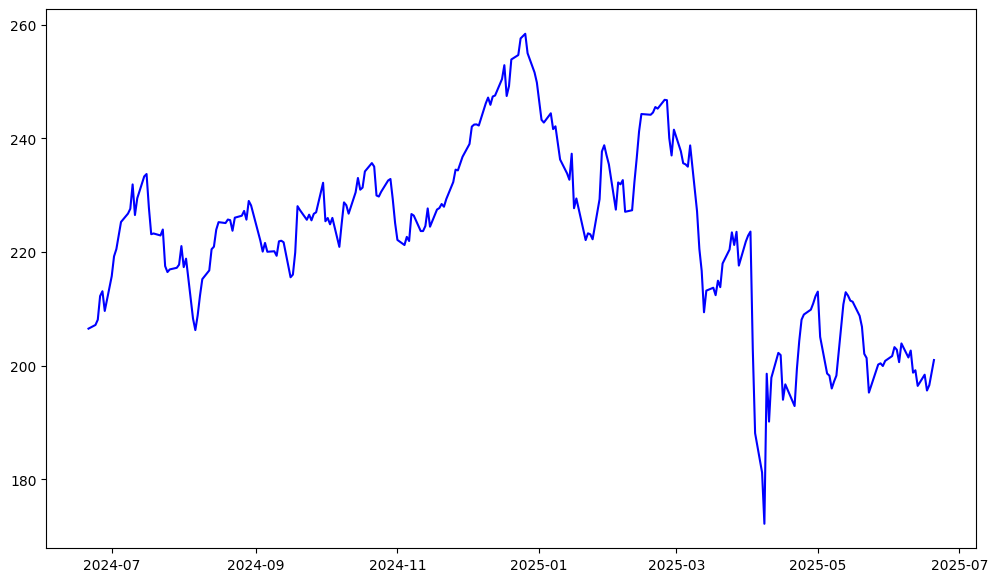

In [7]:
import stock_parser as parser
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
def analyze_stock(data):
    if data.empty:
        return {}

    # 計算簡單移動平均線 (SMA)
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()

    # 計算相對強弱指標 (RSI)
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # 計算布林帶
    data['Bollinger_High'] = data['SMA_20'] + 2 * data['Close'].rolling(window=20).std()
    data['Bollinger_Low'] = data['SMA_20'] - 2 * data['Close'].rolling(window=20).std()

    # 線性回歸模型
    model = LinearRegression()
    X = np.array(range(len(data))).reshape(-1, 1)  # 時間序列作為特徵
    y = data['Close'].values
    model.fit(X, y)
    
    predictions = model.predict(X)
    
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)

    analysis_result = {
        'SMA_20': data['SMA_20'].iloc[-1],
        'SMA_50': data['SMA_50'].iloc[-1],
        'RSI': data['RSI'].iloc[-1],
        'Bollinger_High': data['Bollinger_High'].iloc[-1],
        'Bollinger_Low': data['Bollinger_Low'].iloc[-1],
        'MSE': mse,
        'R2': r2
    }

    return analysis_result

# Example usage of the analyze_stock function
result = analyze_stock(data)
#plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
print(result)

{'SMA_20': np.float64(200.02950057983398),
 'SMA_50': np.float64(202.23868774414063),
 'RSI': np.float64(50.256751010548996),
 'Bollinger_High': np.float64(205.06858837693275),
 'Bollinger_Low': np.float64(194.9904127827352),
 'MSE': 209.35957316660725,
 'R2': 0.11633453733215882}